In [4]:
%pylab inline
from astropy import units
from astropy import constants
from octopus import profiles as pfls
from octopus import cosmotools
import os.path
from LMC_hernquist_a import a_value
#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)
#sns.set(style='ticks', context='talk', font_scale=2)

In [5]:
# Constants
h = 0.7
H = 3.2407789E-18  / units.s * h
G = constants.G
print G, H

  Name   = Gravitational constant
  Value  = 6.67384e-11
  Error  = 8e-15
  Units  = m3 / (kg s2)
  Reference = CODATA 2010 2.26854523e-18 1 / s


# LMC model 

## LMC: Plummer profile

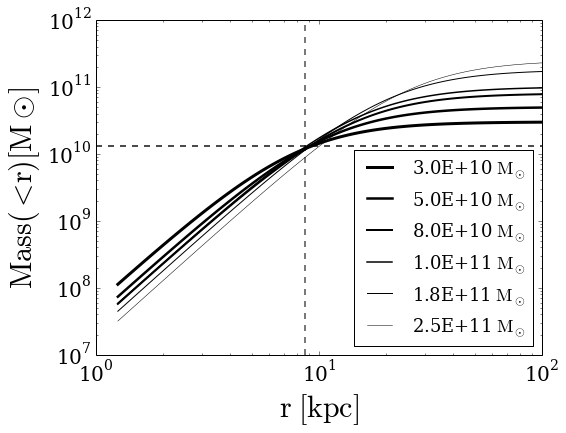

In [97]:
# Mass models of the LMC
MLMC = np.array([3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11])

# Scale length of LMC (Gomez + 15)
LMC_c = np.array([8, 11, 14, 15, 20, 25])


r_lmc = np.logspace(0.1, 2, 100)
Mass_LMC_p = zeros([6, 100])

figure(figsize=(8, 6))
for i in range(6):
    Mass_LMC_p[i,:] = pfls.mass_plummer(LMC_c[i], r_lmc, MLMC[i])
    loglog(r_lmc, Mass_LMC_p[i, :], label="{:.1E}".format(MLMC[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k')

axvline(8.7, lw=1.5, ls='--', c='k', alpha=0.7)
axhline(1.3E10, lw=2, ls='--', c='k', alpha=0.7)
legend(loc='best', ncol=1, fontsize=18)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=30)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=30)
savefig('../doc/LMC_mass_plummer.png', bbox_inches='tight')

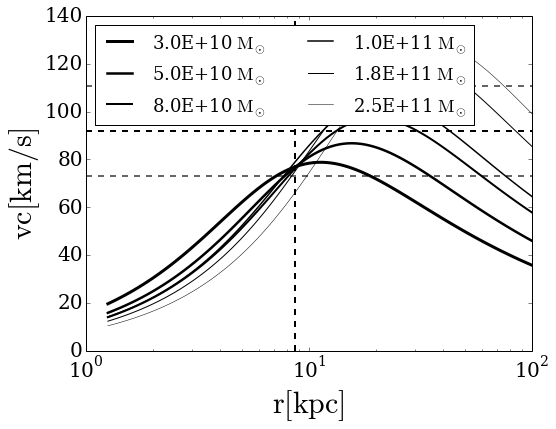

In [75]:
vc_LMC_p = np.zeros([6, 100])

figure(figsize=(8, 6))
for i in range(6):
    vc_LMC_p[i,:] = pfls.vc_plummer(LMC_c[i], r_lmc, MLMC[i])
    semilogx(r_lmc, vc_LMC_p[i, :], label="{:.1E}".format(MLMC[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k')

vc_obs = 91.7 #km/s + put reference
    
axhline(vc_obs, lw=2, ls='--', alpha=1, c='k')
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6, c='k')
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6, c='k')
xlabel('$\mathrm{r[kpc]}$', fontsize=30)
ylabel('$\mathrm{vc[km/s]}$', fontsize=30)
legend(loc='best', ncol=2, fontsize=18)
axvline(8.7, lw=2, ls='--', c='k')

# From cosmological simulations the concentration parameters for the previous Masses for the LMC let to the following rotation curves

### The concentration paramater for a NFW halo is:

In [122]:
def halo_c(M):# from http://adsabs.harvard.edu/abs/2011ApJ...740..102K eq.11
    h = 0.7
    C = 9.60 * (M * h/ 1E12)**(-0.075)
    return C

In [78]:
# concentration paramter from cosmological simulations http://adsabs.harvard.edu/abs/2011ApJ...740..102K
LMC_c_c1 = halo_c(3E10) 
LMC_c_c2 = halo_c(5E10)
LMC_c_c3 = halo_c(8E10)
LMC_c_c4 = halo_c(1E11)
LMC_c_c5 = halo_c(1.8E11)
LMC_c_c6 = halo_c(2.5E11)

print LMC_c_c1, LMC_c_c2, LMC_c_c3, LMC_c_c4, LMC_c_c5, LMC_c_c6

12.8264001882 12.3442903926 11.9167308634 11.718954823 11.2135582183 10.9406564127


In [79]:
## Finding a/rs ratio from Van Der MArel et al 2012 Apendix

In [100]:
def fx(x):
    f = np.log(1.+x) - (x / (1. + x))
    return f

def ars(c):
    x = 1 / ((2.0*fx(c))**(-0.5) - (1.0/c))
    return x

def mhmvir(ar, cvir):
    x = ar**2 / (2.0*fx(cvir))
    return x

MLMC_hern = np.zeros(6)
RvirLMC = np.zeros(6)
aLMC = np.zeros(6)
LMCc = np.zeros(6)
vcLMC_c = np.zeros([6, len(x_LMC_inner)])
LMC_eM = np.zeros([6, len(x_LMC_inner)])


for i in range(0, 6):
    LMCc[i] = halo_c(MLMC[i])
    RvirLMC[i] = cosmotools.rvir(MLMC[i], 0).value
    aLMC[i] = ars(LMCc[i]) * (cosmotools.rvir(MLMC[i], 0).value / LMCc[i])
    MLMC_hern[i] = mhmvir(ars(LMCc[i]), LMCc[i]) * MLMC[i]
    vcLMC_c[i, :] = pfls.vc_hernquist(aLMC[i], r_lmc,  0, 0, MLMC_hern[i])
    LMC_eM[i, :] = pfls.mass_hernquist(aLMC[i], r_lmc, MLMC_hern[i])

In [101]:
print "LMC conncentration paramter:"
print LMCc
print "LMC Virial Radius: "
print RvirLMC
print "LMC hernquist scale length: "
print aLMC
print "Equivalent Hernquist Mass: "
print MLMC_hern

LMC conncentration paramter:
[ 12.82640019  12.34429039  11.91673086  11.71895482  11.21355822
  10.94065641]
LMC Virial Radius: 
[  81.58441562   96.72902056  113.13494877  121.87092914  148.24872168
  165.4042985 ]
LMC hernquist scale length: 
[ 13.69248998  16.78581868  20.24580444  22.129845    27.97510588
  31.89068986]
Equivalent Hernquist Mass: 
[  4.09149597e+10   6.88591568e+10   1.11194357e+11   1.39614141e+11
   2.54343036e+11   3.55695632e+11]


### - Computing the circular velocity for a Hernquist profile

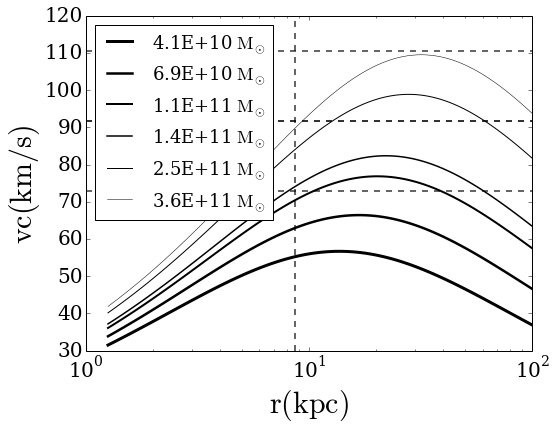

In [102]:
figure(figsize=(8, 6))

for i in range(0, 6):
    vcLMC_c[i, :] = pfls.vc_hernquist(aLMC[i], r_lmc,  0, 0, MLMC_hern[i])
    semilogx(r_lmc, vcLMC_c[i, :], label="{:.1E}".format(MLMC_hern[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k')
    
xlabel('$\mathrm{r(kpc)}$', fontsize=30)
ylabel('$\mathrm{vc(km/s)}$', fontsize=30)
legend(loc='best', fontsize=18)
axhline(vc_obs, lw=2, ls='--', c='k',alpha=0.8)
axhline(vc_obs+18.8, lw=1.5, ls='--', alpha=0.8, c='k')
axhline(vc_obs-18.8, lw=1.5, ls='--', alpha=0.8, c='k')
axvline(8.7, lw=1.5, ls='--', c='k', alpha=0.8)

### - enclosed Mass

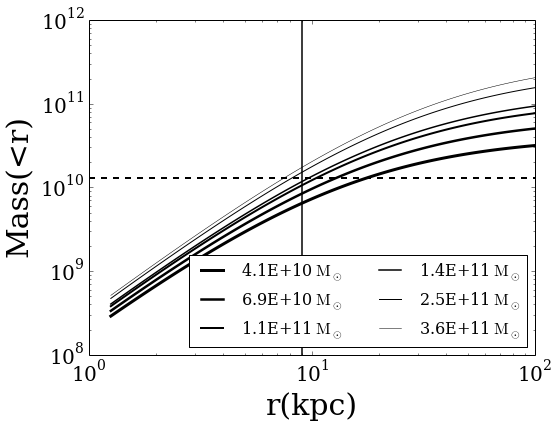

In [108]:
figure(figsize=(8, 6))

for i in range(0, 6):
    loglog(r_lmc, LMC_eM[i, :], label="{:.1E}".format(MLMC_hern[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k') 
legend(loc='best', ncol=2, fontsize=16)
axvline(9, lw=1.5, c='k')
axhline(1.3E10, lw=2, ls='--', c='k')
xlabel('r(kpc)', fontsize=30)
ylabel('Mass(<r)', fontsize=30)

# Finding the Hernquist scale length:

In [117]:
LMC_dm_mass = 1.7E10 - 3.2E9 # Enclosed mass - stellar mass
print LMC_dm_mass

13800000000.0


In [123]:
a_values = np.zeros(6)
for i in range(6):
    a_values[i] = a_value(MLMC[i], LMC_dm_mass)
print a_values

[  4.35117559   8.16408204  12.62481241  15.14207104  23.30465233
  29.00550275]


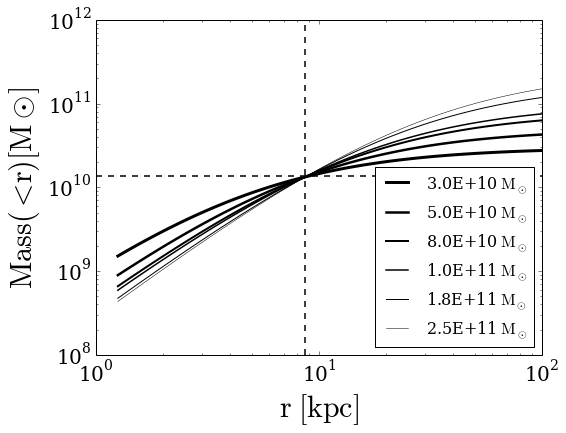

In [147]:
LMC_M_h = np.zeros([6, 100])
LMC_rho_h = np.zeros([6, 100])
vcLMC_f = np.zeros([6, 100])

figure(figsize=(8, 6))
for i in range(6):
    LMC_M_h[i,:] = pfls.mass_hernquist(a_values[i], r_lmc, MLMC[i])
    LMC_rho_h[i,:] = pfls.dens_hernquist(a_values[i], r_lmc, MLMC[i])
    loglog(r_lmc, LMC_M_h[i,:], label="{:.1E}".format(MLMC[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k')
    
    
axvline(8.7, lw=1.5, c='k', ls='--', alpha=1)
axhline(1.38E10, lw=1.5, ls='--', c='k', alpha=1)
legend(loc='best', ncol=1, fontsize=16)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=30)
ylabel('$\mathrm{Mass(<r)[M\odot]}$', fontsize=30)
savefig('../doc/LMC_mass_hernquist.png', bbox_inches='tight', dpi=300)

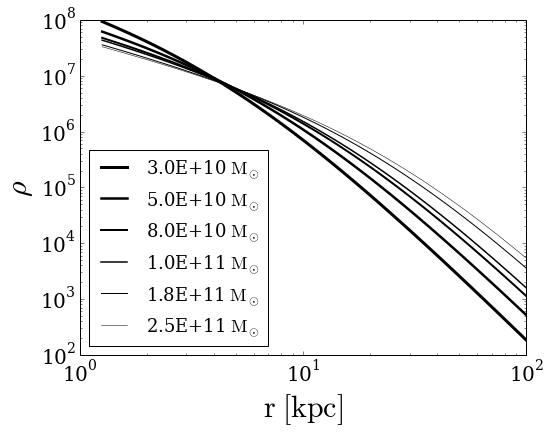

In [140]:
figure(figsize=(8, 6))
for i in range(6):
    loglog(r_lmc, LMC_rho_h[i,:], label="{:.1E}".format(MLMC[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k')

legend(loc='best', fontsize=18)
xlabel('$\mathrm{r\ [kpc]}$', fontsize=30)
ylabel(r'$\mathrm{\rho}$', fontsize=30)

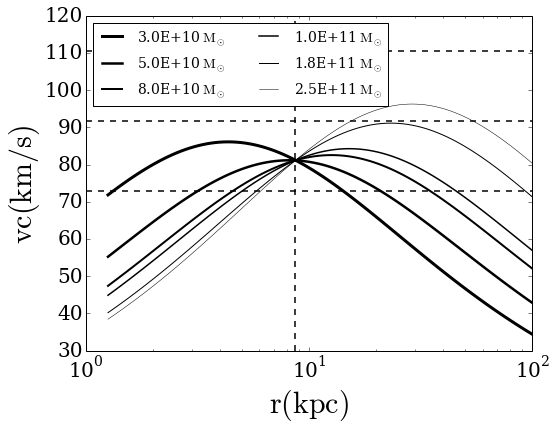

In [145]:
figure(figsize=(8, 6))
for i in range(6):
    vcLMC_f[i, :] = pfls.vc_hernquist(a_values[i], r_lmc,  0, 0, MLMC[i])
    semilogx(r_lmc, vcLMC_f[i,:], label="{:.1E}".format(MLMC[i]) + '$\mathrm{\ M_{\odot}}$', lw= 0.5*(6-i), c='k')
    
xlabel('$\mathrm{r(kpc)}$', fontsize=30)
ylabel('$\mathrm{vc(km/s)}$', fontsize=30)
legend(loc='best', ncol=2, fontsize=14)
axhline(vc_obs, lw=1.5, ls='--', c='k', alpha=1)
axhline(vc_obs+18.8, lw=1.5, ls='--', c='k', alpha=1)
axhline(vc_obs-18.8, lw=1.5, ls='--', c='k', alpha=1)
axvline(8.7, lw=1.5, ls='--', c='k', alpha=1)
savefig('../doc/LMC_rotcurve_hernquist.png', bbox_inches='tight', dpi=300)

# printing the LMC IC for GalIC

In [148]:
def IC(M_hern):
    vc = (M*units.Msun * (np.sqrt(48.6)*G*H))**(1.0/3.0)
    vc = vc.to(units.km / units.s)
    return vc

In [193]:
def GalIC_input(Vvir, c):
    Vvir = units.km / units.s
    Mvir = Vvir**3.0/(6.97*G*H)
    Rvir = Vvir / (6.97*H)
    Rvir = Rvir.to('kpc')
    R_s = Rvir/c
    print Rvir
    R_s = R_s.to('kpc')
    f_c = np.log10(1+c) - c/(1+c)
    print f_c, Mvir.to('Msun')
    A = R_s * np.sqrt(2.0*np.log10(1+c)-c/(1+c))
    print R_s, A
    mhmvir = (A/R_s)**2.0 / (2.0*f_c)
    Mvir = mhmvir * Mvir
    return Mvir.to('Msun'), A.to('kpc')

In [196]:
GalIC_input(300, 20)

2.04960057425 kpc
1.32221929473 476417.133065 solMass
0.102480028713 kpc 0.166650254583 kpc


(<Quantity 476417.1330653852 solMass>, <Quantity 0.1666502545828248 kpc>)

## GalIC models


In [41]:
path = '../ICs/LMC/'
LMC1 = loadtxt(path + "LMC1_rotcurve.txt", skiprows=1)
LMC2 = loadtxt(path + "LMC2_rotcurve.txt", skiprows=1)
LMC3 = loadtxt(path + "LMC3_rotcurve.txt", skiprows=1)
LMC4 = loadtxt(path + "LMC4_rotcurve.txt", skiprows=1)
LMC5 = loadtxt(path + "LMC5_rotcurve.txt", skiprows=1)
LMC6 = loadtxt(path + "LMC6_rotcurve.txt", skiprows=1)

R1 = LMC1[:,0]
R2 = LMC2[:,0]
R3 = LMC3[:,0]
R4 = LMC4[:,0]
R5 = LMC5[:,0]
R6 = LMC6[:,0]

vc_LMC1 = LMC1[:,1]
vc_LMC2 = LMC2[:,1]
vc_LMC3 = LMC3[:,1]
vc_LMC4 = LMC4[:,1]
vc_LMC5 = LMC5[:,1]
vc_LMC6 = LMC6[:,1]

(0, 50)

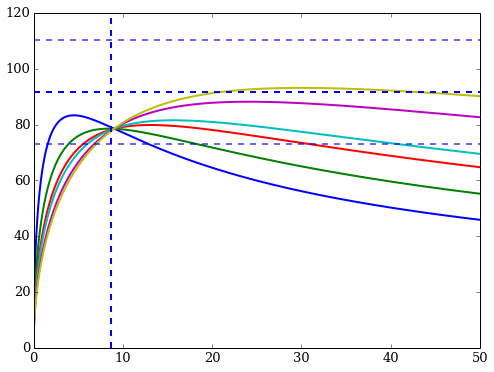

In [43]:
figure(figsize=(8, 6))

plot(R1/h, vc_LMC1, lw=2)
plot(R2/h, vc_LMC2, lw=2)
plot(R3/h, vc_LMC3, lw=2)
plot(R4/h, vc_LMC4, lw=2)
plot(R5/h, vc_LMC5, lw=2)
plot(R6/h, vc_LMC6, lw=2)

axhline(vc_obs, lw=2, ls='--', alpha=1)
axhline(vc_obs+18.8, lw=2, ls='--', alpha=0.6)
axhline(vc_obs-18.8, lw=2, ls='--', alpha=0.6)
axvline(8.7, lw=2, ls='--')
xlim(0, 50)

In [37]:
## GalIC input:

def galIC_Hern(Mvir, A):
    Mvir = Mvir * units.Msun
    Vvir = (6.9713700231733506 * G * H * Mvir)**(1/3.) 
    Rvir = Vvir / (6.9713700231733506 * H)
    Rvir = Rvir.to(units.kpc)
    A = A * units.kpc
    C = Rvir / A
    return Vvir.to(units.km/units.s), C

In [38]:
galIC_Hern(2.5E11, 30)

(<Quantity 80.66392145445715 km / s>, <Quantity 5.509877636290169>)